# Lab 5: Singular Value Decomposition

In this lab, you will learn gain more experience with ranks and Singular Value Decomposition (SVD) and learn how to use SVD in data science.

## Lab 5.A: SVD Tutorial with Questions (25% of the lab grade)

Let us start by importing two libraries, numpy and matplotlib. 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [3]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A)) 

# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)

print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))
print('size of A:')
print(np.shape(A))
print('type of objects u and A:')
print(type(u), type(A))

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1
vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]
rank of matrix A:   
1
size of A:
(5, 4)
type of objects u and A:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [4]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1]])
print('vector u1:  ')
print(u1)
print('vector u2:  ')
print(u2)
v1 = np.transpose([[1,0,2]])
v2 = np.transpose([[0,1,1]])
print('vector v1:   ')
print(v1)
print('vector v2:   ')
print(v2)
A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector v2:   
[[0]
 [1]
 [1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [5]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print(U)
V = np.concatenate((v1,v2), axis = 1)
print(V)
A = np.dot(U,np.transpose(V))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


**Question 1**. Explain why the previous 2 ways of creating the rank-2 matrix end up in exactly the same result. (*Note*: it is very important to understand why, so thake some time to think about it. It is acceptable to work out your explanation on a piece of paper and submit a photo of it as pdf file)

**Question 2**. Write a piece of code that generates a rank-3 matrix of dimension 6x5

**Answer 1**:
The previous two ways of creating the matrix end up with the same result due to the math behind it. Both matrix multiplications require the same amount of multiplying corresponding elements and then adding them together to form the new matrix. The second method is simply a more compact form/way of completing what the first method does. The first method asks us to add the two resultant matrices together as a separate step while the second one does the addition within it's matrix multiplication.

In [6]:
## Answer 2
U = [[1,2,3],[3,4,5],[7,8,9],[7,8,9],[1,3,5],[3,5,2]]
V = [[1,2,3,4,5],[1,1,4,5,6],[2,3,1,4,6]]
A = np.dot(U,V)
print('Matrix A:')
print(A)
print('Rank of Matrix A')
print(np.linalg.matrix_rank(A))

## OR

new_U = np.random.rand(6,3)
new_V = np.random.rand(5,3)
new_A = np.dot(new_U,np.transpose(new_V))
print(new_A)
print('Rank of Matrix new_A:', np.linalg.matrix_rank(new_A))

Matrix A:
[[  9  13  14  26  35]
 [ 17  25  30  52  69]
 [ 33  49  62 104 137]
 [ 33  49  62 104 137]
 [ 14  20  20  39  53]
 [ 12  17  31  45  57]]
Rank of Matrix A
3
[[0.8442152  0.7501385  0.9513022  0.70841016 0.61781643]
 [1.02078659 0.97272664 1.29933997 0.96364994 0.74356394]
 [0.40328027 0.46165159 0.60632494 0.35315484 0.41386774]
 [0.60165354 0.79215578 1.00137767 0.43880681 0.81943325]
 [0.110747   0.41689901 0.55976113 0.07644419 0.49717968]
 [0.64254008 0.50065526 0.53381679 0.36739536 0.52020363]]
Rank of Matrix new_A: 3


Here is another way to quickly generate a large low-rank matrix. 

In [7]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))
print('Matrix: ')
print(A)
print('Rank of matrix: ')
print(np.linalg.matrix_rank(A))

Matrix: 
[[0.41358778 0.55981716 0.76030441 0.80392726 0.97980787 1.35081719
  1.53210134 0.40135222 0.59255312 1.36029879 1.68506571 0.59718831
  1.03716951 0.78075187 1.33786841 0.25649699 1.0482786  1.10670663
  0.95412753 1.75819429 1.76787619 1.00370675 1.56085104 0.98292696
  1.58479823 0.88750214 1.66337698 1.33350304 1.55691644 1.19385298
  0.71412939 1.29008568 0.98509138 0.52013638 1.1729384  1.61860307
  0.3483058  0.44288741 1.4084916  1.60368895 0.77138424 1.22903789
  0.99459022 1.2294188  1.33906213 1.25540466 0.82388692 1.41843281
  1.39648101 1.1125059  0.70930771 0.30934186 0.30374821 0.79709708
  0.47083893 0.50791185 0.83338305 1.30888145 1.2589287  0.33260386
  1.69103934 1.34056467 1.64216046 0.76589413 1.33067551 0.91941127
  1.63879918 1.08777959 1.46371749 0.36753989 1.21274608 1.13617647
  0.80220023 0.66212542 1.0633371  1.16644169 0.65265355 1.31139953
  0.60776355 1.17706391 1.05193353 1.02809359 1.30378109 0.8869346
  1.07853113 0.36589833 1.60219803 1.530

**Question 3**. 
- What is the size of matrix A?
- What does the command `np.random.rand(2,100)` do?
- What is the rank of A? Why?

**Answer 3**:
* Size of matrix A is 5 by 100 because the first parameter of the outer dot product is a 5 by 2 matrix while the second parameter is a 2 by 100 matrix.
* The command `np.random.rand(2,100)` creates a random array of size 2 by 100 with random numbers in the range `[0,1)`
* The rank of A is 2 which is plausible because the maximum rank a resulting product matrix can have is the smaller max rank of the two parameter matrices. For example, our components are one matrix of size 5 by 2 and one of size 2 by 100. The highest possible rank of each is 2. However, let's say one component's highest rank is 1 then the resulting product matrix would be rank 1.

The rank of a zero matrix is always zero.

In [8]:
A = np.zeros((20,4))
print(A)
print(np.linalg.matrix_rank(A))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
0


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ...
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226, 2)


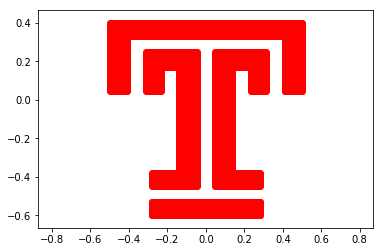

In [9]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print(A)
print('The dimensions of A are: ' , np.shape(A))
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[0.78599314 0.33669955]
 [0.9165422  0.07324179]]


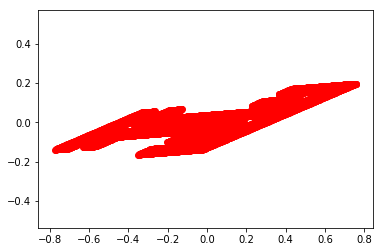

In [10]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 3]]


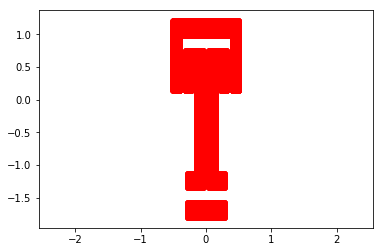

In [11]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.4535961214255773, 0.8912073600614354], [-0.8912073600614354, 0.4535961214255773]]


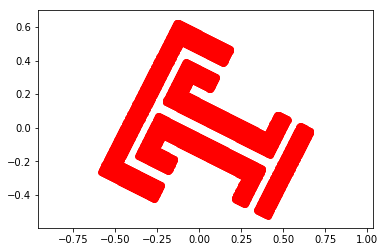

In [12]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

**Question 4**. Create a letter T that is 2 times wider than its original version and then rotated by 145 degrees counterclock-wise.

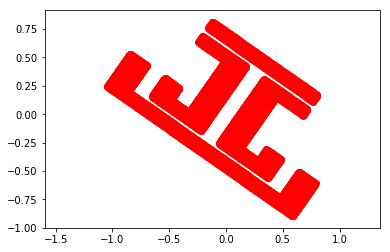

In [13]:
## Answer 4
W = [[2,0],[0,1]]
A4 = np.dot(A,W)
angle = np.pi*29/36   ## 145 degrees equals 29pi/36 in radians
R = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
A4 = np.dot(A4,R)
plt.scatter(A4[:,0],A4[:,1],color='red');
plt.axis('equal');

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226, 100)


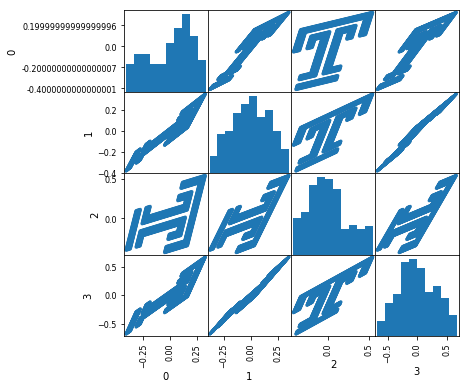

In [14]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print(np.shape(Abig))
# to plot a scatterplot of the first 4 columns... it will take a minute...

pd.plotting.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));

**Question 5**. What is the rank of `Abig` and why?

Let us perform SVD on matrix `Abig`.

**Answer 5**:
The rank of Abig is still 2 because of the fact that the max rank of the individual factor matrices A and T each only have a max rank of 2. `A` is a matrix of size (28226,2) and `T` is a matrix of size (2,100). Their resulting matrix can have AT MOST a rank of the smaller max_rank between the two factor matrices.

In [15]:
## Checking for Answer 5
print(np.linalg.matrix_rank(Abig))

2


In [16]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print(U.shape, s.shape, V.shape)
print('the first 10 singular values:', s[0:10])

(28226, 100) (100,) (100, 100)
the first 10 singular values: [3.62079686e+02 1.29578733e+02 9.64518915e-14 7.47665375e-14
 4.04678586e-14 3.07804152e-14 3.07804152e-14 3.07804152e-14
 3.07804152e-14 3.07804152e-14]


Let us find a rank-2 approximation of `Abig`

In [17]:
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of Abig:  ', np.linalg.norm(Abig, ord=2))
print('First 10 singular values: ',  s[0:10])
print('Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))
print('Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord='fro'))

Norm of Abig:   362.079686376663
First 10 singular values:  [3.62079686e+02 1.29578733e+02 9.64518915e-14 7.47665375e-14
 4.04678586e-14 3.07804152e-14 3.07804152e-14 3.07804152e-14
 3.07804152e-14 3.07804152e-14]
Norm of difference Abig-Ak =  3.503507356241103e-13
Norm of difference Abig-Ak =  3.737808042539464e-13


**Question 6**.
- Find the Frobenius norm of the difference `Abig - Ak`
- Find rank-1 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.
- Find rank-3 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.

In [18]:
## Answer 6
print("Frobenius norm of the difference 'Abig-Ak' = ", np.linalg.norm(Abig-Ak, ord='fro'))
print("rank-1 approximation of 'Abig': ", )

k = 1
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('2-Norm of difference Abig-Ak = ', np.linalg.norm(Abig-Ak, ord=2))
print("Frobenius norm of difference 'Abig-Ak' = ", np.linalg.norm(Abig-Ak, ord='fro'))
# The 2 norm and Frobenius norm of the difference is exactly the same because in cases where matrix rank is 1 or 0,
#  these two value equate to the same thing. This is due to an equality which states the largest singular value
#  of a matrix (2-norm) is less than or equal to the square root of the summation of all values squared
#  within a matrix. (Frobenius norm)

k = 3
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('2-Norm of difference Abig-Ak = ', np.linalg.norm(Abig-Ak, ord=2))
print("Frobenius norm of difference 'Abig-Ak' = ", np.linalg.norm(Abig-Ak, ord='fro'))
# The values are slightly different as is normal with the rank approximation being 3. Also as expected, the
#  frobenius norm is a bigger value than the 2-norm.

Frobenius norm of the difference 'Abig-Ak' =  3.737808042539464e-13
rank-1 approximation of 'Abig': 
2-Norm of difference Abig-Ak =  129.57873297449783
Frobenius norm of difference 'Abig-Ak' =  129.57873297449783
2-Norm of difference Abig-Ak =  3.506443242602119e-13
Frobenius norm of difference 'Abig-Ak' =  3.859822528081213e-13


Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

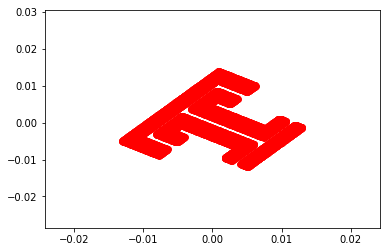

In [19]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [20]:
Abig_noise = Abig + np.random.randn(28226,100)*0.5
print(np.shape(Abig_noise))
print(Abig_noise)

(28226, 100)
[[ 0.02011694  0.56685539 -0.55473894 ...  0.00237564  0.1854306
  -0.97352942]
 [ 0.66396836 -0.62796875 -1.01730374 ... -0.03898936 -0.02440871
  -0.38189865]
 [-0.10117875 -0.06948779  0.80534511 ... -0.10125309  0.0166746
  -0.31581158]
 ...
 [ 0.65625637  0.0930323   0.78142567 ... -0.01756423 -0.14896734
   0.59966088]
 [-0.57493542  1.00441393  0.52080576 ... -0.05994485  0.40564759
  -0.14972741]
 [-0.37620325 -0.16815195  0.2623992  ...  0.49749337 -0.54620926
   0.57727705]]


**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

First 10 singular values: [371.64688187 155.08006288  88.57584501  88.30746731  88.2033247
  88.13274801  87.98690687  87.92050096  87.71510543  87.59630206]
Norm of Abig_noise:   371.6468818671863
First 10 singular values:  [371.64688187 155.08006288  88.57584501  88.30746731  88.2033247
  88.13274801  87.98690687  87.92050096  87.71510543  87.59630206]
Norm of difference Abig_noise - Ak =  88.57584500919765


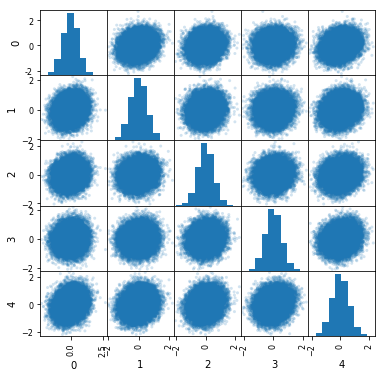

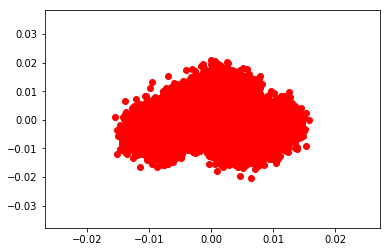

In [21]:
## Answer 7
# Scatterplot of the first 5 columns in Abig_noise
pd.plotting.scatter_matrix(pd.DataFrame(Abig_noise[:,0:5]), alpha=0.2, figsize=(6, 6));
# The first 5 columns of Abig_noise seemingly produce circular shaped scatterplots which means that their
#  correlation with each other is 0.

# SVD on Abig_noise
U, s, V = np.linalg.svd(Abig_noise, full_matrices = 0)
print('First 10 singular values:', s[:10])

# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of Abig_noise:  ', np.linalg.norm(Abig_noise, ord=2))
print('First 10 singular values: ',  s[0:10])
print('Norm of difference Abig_noise - Ak = ', np.linalg.norm(Abig_noise - Ak, ord=2))

# Scatterplot of U from Abig_noise
plt.figure()
plt.scatter(U[:,0],U[:,1],color='red')
# The scatterplot of the first two columns have now become a much more ovular shape than the first two columns of
#  the original Abig. This is normal because we multiplied Abig with random numbers wtihin the range [0,1) to create
#  Abig_noise. Therefore the correlation of the new matrix has a good chance of being "mishapened" while compared to
#  the original factor matrices. Note: The shape somewhat resembles a heart!

## Lab 5.B: Apply SVD on real data (75% of the lab grade)

In this part of the lab you will be studying 2 real-life data sets: *Iris* and *Newsgroups*.

### Iris Data Analysis
Download `iris.csv` file to your local folder. This is a famous data set for benchmarking of data science algorithms. You can access the original data from https://archive.ics.uci.edu/ml/datasets/Iris and you can learn more about it from https://en.wikipedia.org/wiki/Iris_flower_data_set. Please take a moment to read about it.

Load `iris.csv` into Python:

In [22]:
# load the matrix
d = np.loadtxt('iris.csv', delimiter=",",usecols=(0,1,2,3))
# with the following command you will create a vector that reveals what type of Iris is represented in each row
y = np.array([1]*50+[2]*50+[3]*50)

**Question 8**.
- How large is the data set?
- Plot the scatter plot ofr each pair of the attributes. Do you see any correlations? What are the correlations between the attributes?
- Plot the scatterplot between the first two attributes, but this time use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
- What is the rank of `d`?

**Question 9**. Apply SVD on matrix `d`. 
- Look at the singular values. What do they tell us about the possibility to approximate `d` with a lower rank matrix?
- Calculate rank-2 approximation of `d`. Let us call it `d2`. Plot the scatterplot for each pair of attributes in `d2` and use `y` to color the dots. Is it easier or more difficult to distinguish different values of `y`?
- Plot the scatter plot of the first 2 columns of the `U` matrix (the left singular matrix). Is it easier or more dificult to distinguish between different values of `y`? Please discuss your findings.

The data set contains 150 x 4 elements
Rank of d: 4


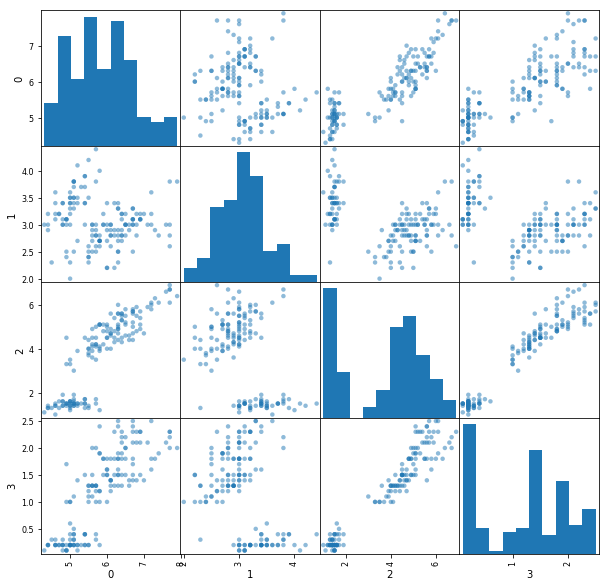

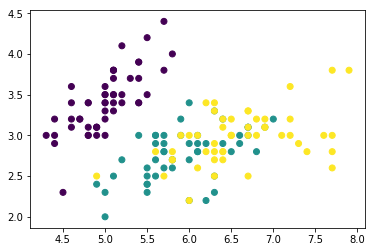

<Figure size 432x288 with 0 Axes>

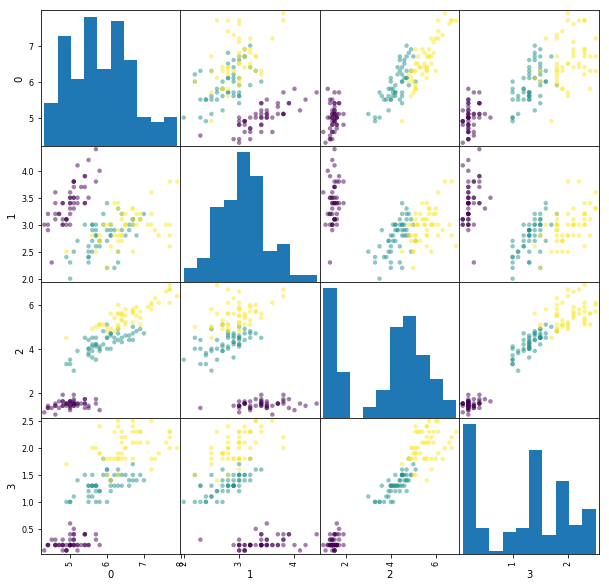

In [23]:
## Answer 8
# Data set size
print('The data set contains', np.shape(d)[0], 'x', np.shape(d)[1], 'elements')

# Scatterplot matrix of all pairs of attributes
pd.plotting.scatter_matrix(pd.DataFrame(d), alpha = 0.5, figsize=(10,10), s=80)
# The attribute pairs (2,3), (0,2), and (0,3) all have seemingly positive correlations. The pair with the highest
#  correlation would be (2,3) as its scatter plot most resembles a straight line.

# Scatterplt of first two attributes with color
plt.figure()
plt.scatter(d[:,0],d[:,1],c=y)
# Between all pairs of attributes with color
plt.figure()
pd.plotting.scatter_matrix(pd.DataFrame(d), alpha = 0.5, figsize=(10,10), c=y, s=80)
# The purple dots can definitely be discriminated quite clearly but the yellow and cyan colored dots are mixed
#  together so it's harder to tell them apart. I can see that there are a few cyan dots hidden behind yellow plots
#  which means there are similar attributes between different types of flowers.
# In the scatter matrix, the pair of attributes which separates the colors best would be (2,3). All other pairs
#  of attributes actually separate them moderately well with only a few data plots mixed together. The ONLY
#  really bad pair is (0,1) which seems to have many data plots mixed in color.

# Rank of d
print("Rank of d:", np.linalg.matrix_rank(d))

Singular values:  [95.95066751 17.72295328  3.46929666  1.87891236]
(150, 4)
(150, 4)


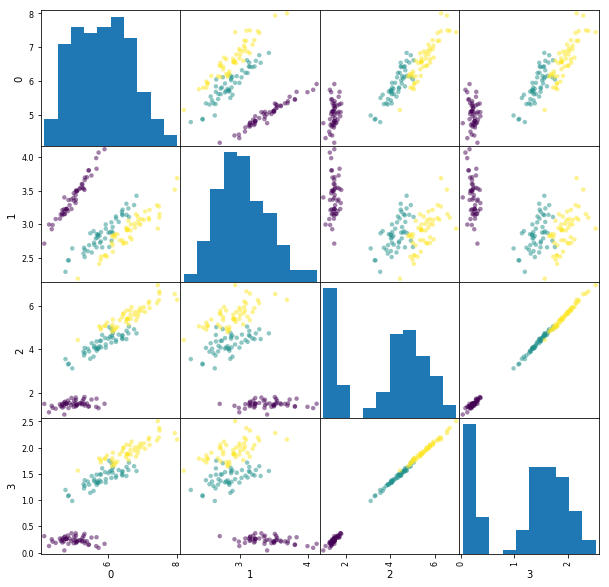

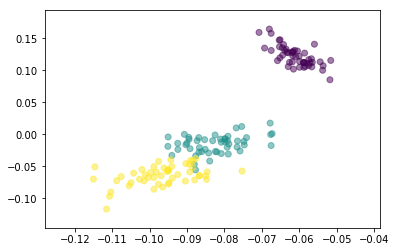

In [27]:
## Answer 9
# Singular Values
U,s,V = np.linalg.svd(d, full_matrices = 0)
print("Singular values: ", s)
# The number of singular values there are represents the rank of the original matrix we applied SVD on. The individual
#  values themselves each represent how well each rank-approximation captures all the norm of the original matrix.
#  The smaller the value, the better it approximates the original matrix's norm. Hence, the rank-3 approximation
#  matrix provides the best approximation. However, this doesn't mean rank-1 is a bad approximation. The ratio can
#  be outputted as 1-(17.72/95.95) which is equal to around 82% of the original matrix's norm. This is not a bad
#  approximation as it captures over 80% of the norm.

# Rank-2 approximation of d
k = 2
d2 = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
pd.plotting.scatter_matrix(pd.DataFrame(d2), alpha=0.5, figsize=(10,10), c=y, s=80)
# In my opinion it is harder to differentiate between the different values of y because the original matrix's
#  best attribute pair was (2,3) but that scatter plot has now become more condensed with multiple cyan and
#  yellow plot points overlapping. Meanwhile, the one which benefited the most is pair (0,1). Specifically, this
#  pair has become more spread out with less plot points overlapping.

# Scatterplt of first 2 columns
plt.figure()
plt.scatter(U[:,0], U[:,1], alpha=0.5, c=y)
# As mentioned in my previous answer, this pair (0,1) is the one who benefited most from SVD as its scatterplot
#  is much more spread out and less overlapping. Here, we still see some overlapping data points but the clusters
#  are less mixed together than previously. So I find it easier to distinguish.

### Newsgoups data analysis

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `groupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [24]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

**Question 10**. 
- find the counts of each of the 100 words and plot the bar plot of the counts. Which words are the most popular?
- find the counts of the 4 types of articles in the documents. Which type of article is the most popular?

Since the `documents` matrix is huge, we cannot do too much to further explore it. That is why we will try with the SVD.

**Question 11**.
- what is the rank of `documents`?
- perform SVD of documents
- list the first 10 singular values. Plot all 100 singular values. What can we conclude with the respect to low-rank approximation of the matrix?
- let us plot the scatterplot of the first 2 rows of `V`. Use plt.text method to plot the name of each dot (use `wordlist` values) above each dot. Discuss what you see.
- let us plot the scatterplot of the first 2 columns of `U`. Since `U` is too big, you can randomly select 1000 rows to plot. Use 4 colors to render each dot by its group name. Discuss what you see.

The following lines of code will be useful for plotting. Consider reusing them in your study:

The top 10 most popular words are:
problem       2241
help          2193
question      2106
email         1936
university    1796
system        1748
fact          1713
course        1581
world         1552
case          1524
dtype: int64


Text(0, 0.5, 'Count')

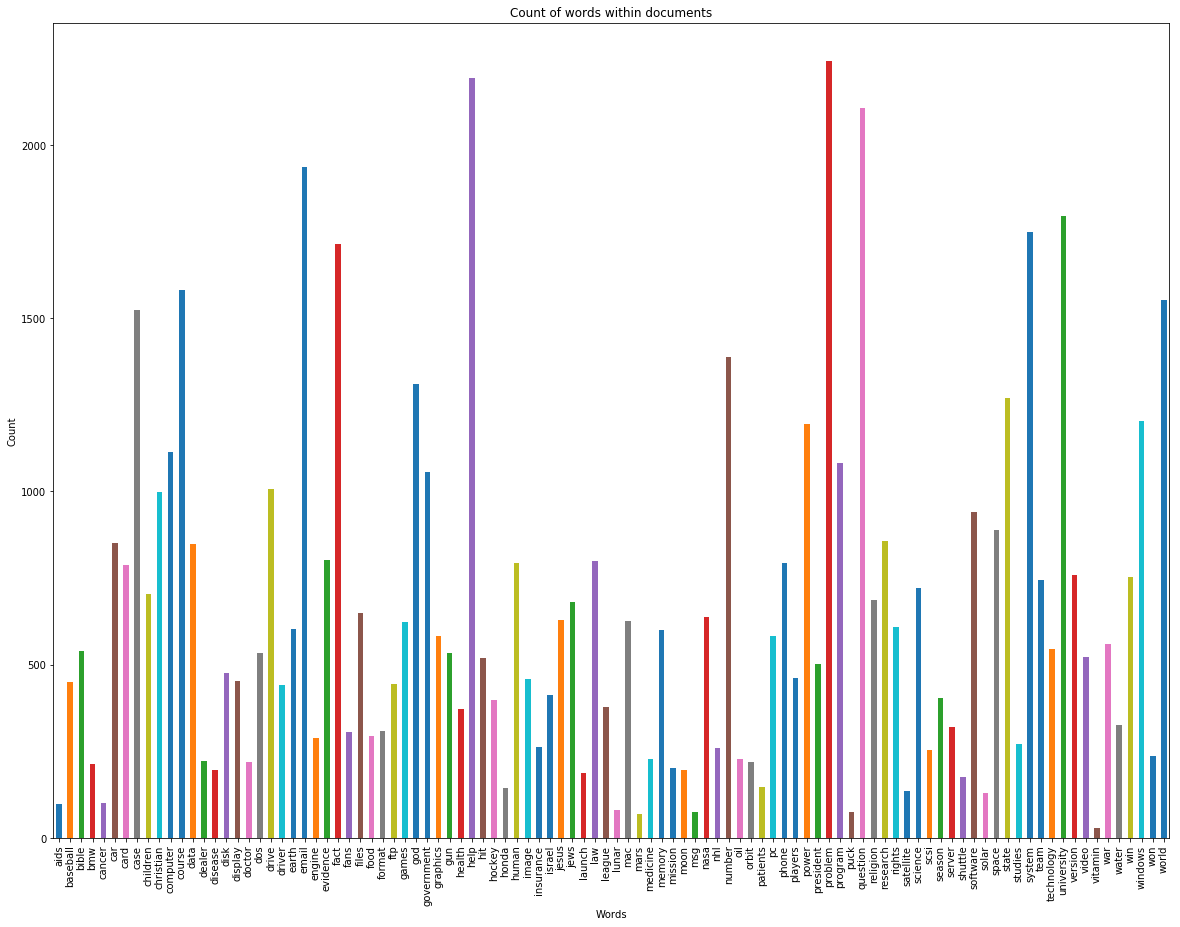

In [25]:
## Answer 10 PART 1
word_index = []
for i in range(100):
    word_index.append(wordlist[i][1:-1])
#print(DFindex)
documentsDF = pd.DataFrame(documents, columns=word_index)
#print(documentsDF)
word_count = []      # Getting the count of each word within all documents
for i in word_index:
    word_count.append(documentsDF[i].sum())
word_dict = {}     # appending the words and word_counts to a dictionary to then convert to Series
for i in range(len(word_index)):
    word_dict[word_index[i]] = word_count[i]
word_series = pd.Series(word_dict)     # Convert to Series for easier plotting and sorting
print('The top 10 most popular words are:')
print(word_series.sort_values(ascending=False).head(10))
plt.figure(figsize=(20,15))
word_series.plot(kind='bar')    # bar plot of 100-word counts
plt.title('Count of words within documents')
plt.xlabel('Words')
plt.ylabel('Count')

{'comp.*': 4605, 'rec.*': 3519, 'sci.*': 2657, 'talk.*': 5461}
Most popular type of article is talk articles with 5461 articles.


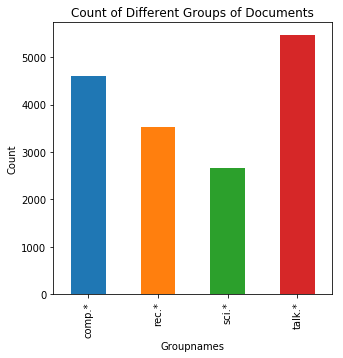

In [26]:
## Question 10 PART 2
#print(documentsDF.head())
#documentsDF = documentsDF.assign(group = newsgroup)
#print(documentsDF.head())   # Seeing the difference between before and after assign function
#DFgroups = documentsDF.groupby(documentsDF['group']).count()
#DFgroups = DFgroups['aids']
#print(DFgroups)

## -OR-
groupnum, counts = np.unique(newsgroup, return_counts = True)
grpnames = dict(zip(groupnum,counts))
grp_list = list(grpnames.values())
grp_dict = {}
for i in range(len(grp_list)):
    grp_dict[groupnames[i]] = grp_list[i]
print(grp_dict)
grp_series = pd.Series(grp_dict)
plt.figure(figsize=(5,5))
grp_series.plot(kind = 'bar')
plt.title('Count of Different Groups of Documents')
plt.xlabel('Groupnames')
plt.ylabel('Count')
print('Most popular type of article is talk articles with', grp_series[-1], 'articles.')

Rank of documents: 100
First 10 Singular Values: [85.83514637 56.41449164 44.17905789 43.1547786  41.97727192 40.83237512
 40.44698116 39.35243106 38.69233467 36.93978716]
1
2
3
4


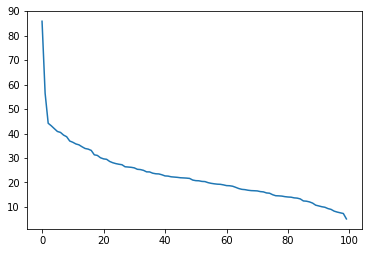

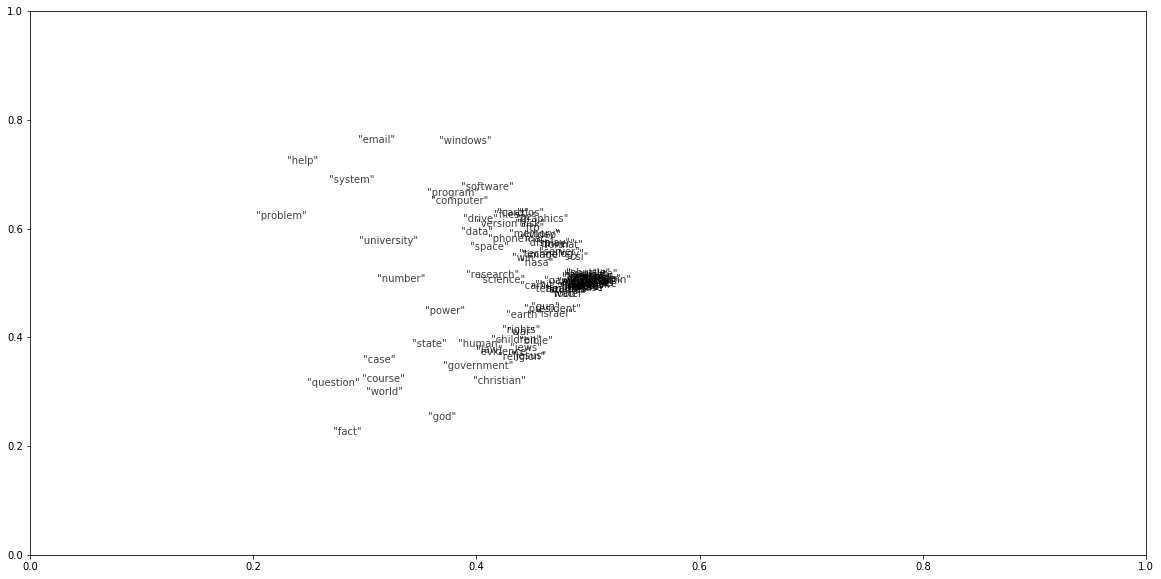

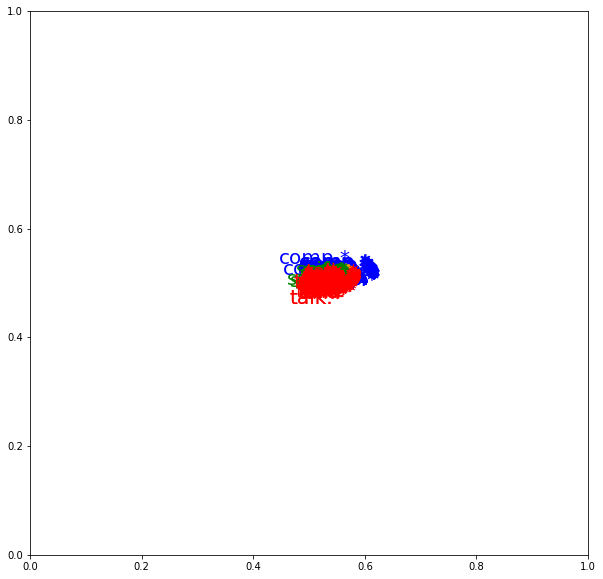

In [27]:
## Answer 11
# Rank of documents
print('Rank of documents:', np.linalg.matrix_rank(documents))

# SVD
U,s,V = np.linalg.svd(documents,full_matrices=0)

# First 10 Singular Values
print('First 10 Singular Values:', s[:10])
plt.plot(s)
# The singular values show that there is a slow progression to a better rank approximation of the original matrix.
#  I find this normal as the original matrix is of rank 100 meaning it's hard to reduce down to anything smaller.
#  Between each singular value which represents how much of the norm is captured within each rank approximation
#  the difference is at most 3 to 4 point difference after rank-2. The low rank approximations do not provide as
#  good of an approximation as when the original matrix's rank is smaller like previous examples. The rank-1
#  approximation only provides us with around 34% of the values within the original matrix, which is pretty low.
#  I recommend the best approximations to be somewhere midpoint around ranks 40 to 60 as these capture the main
#  signal of the singular values while ignoring noise.

# Scatterplot of first 2 rows of V
plt.figure(figsize=(20,10))
for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=10, alpha=0.75)
# I see that the scatterplot exhibits clusters where words that are more frequently seen together in the same articles
#  are grouped closer. For example 'god', 'world', and 'christian' are closer together than they are to 'system',
#  'email', and 'windows'. There is a big cluster at the center of the graph which is I'm guessing words that
#  really are seen together often within articles making them barely decipherable due to overlapping.

# Scatterplot of first 2 columns of U
plt.figure(figsize=(10,10))
c = ['blue','orange','green','red']
r=np.random.randint(0,16242,1000)
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),250)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=20)
    print(i)
# The words are all mixed together in a big cluster that it's hard to decipher which word is which. Orange is almost
#  completely overlapped by the red plots.

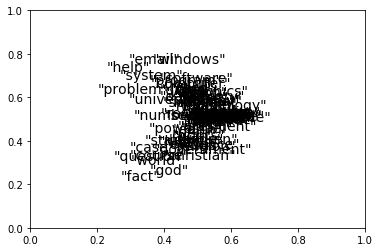

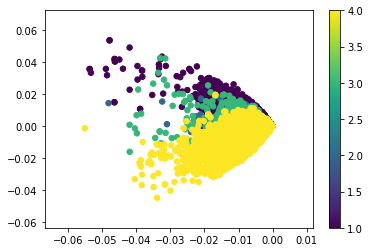

1
2
3
4


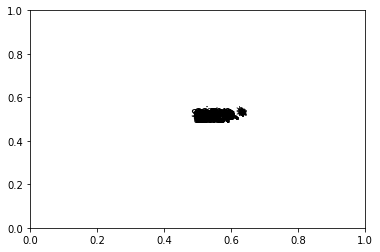

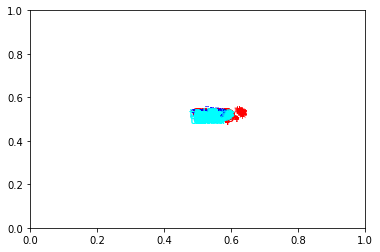

In [28]:
U,s,V=np.linalg.svd(documents,full_matrices=0)
for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=14)
plt.figure()

sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
plt.colorbar(sc)
plt.show()

r=np.random.randint(0,16242,100)
plt.figure()
for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
    plt.text(x,y,groupname,fontsize=14)

c = ['red','green','blue','cyan']
plt.figure()
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),50)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=14)
    print(i)